In [13]:
#import calc
import matplotlib.pyplot as plt
import numpy as np
from math import *
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import random,string
# 加载中文字体并设置为默认字体
# Set the font path
font_path = '/System/Library/Fonts/PingFang.ttc'
# Load the font properties
font_prop = fm.FontProperties(fname=font_path)

# Configure matplotlib to use the specified font as the default
plt.rcParams['font.family'] = font_prop.get_name()


In [8]:
# 输入变量 PT RA RI；输出变量 AI

def calc_AI(RA,RI,PT,d):

	# radians: 角度转弧度
	RA = radians(RA)
	RI = radians(RI)
	PT = radians(PT)
 
	V1 = np.array([0,0,-1])
	M1 = np.array([
		[1,       0,       0 ],
		[0, cos(RA),-sin(RA) ],
		[0, sin(RA), cos(RA) ],
		])

	# V2 = M1 * V1
	V2 = M1.dot(V1)
	# d = 1 or -1
	M2 = np.array([
		[cos(-RI * d) , 0 , sin(-RI * d)],
		[0,             1,            0 ],
		[-sin(-RI * d) ,0 ,cos(-RI * d) ],
		])
	# V3 = M2 * V2
	V3 = M2.dot(V2)
	M3 = np.array([
		[1,       0,       0 ],
		[0, cos(PT), -sin(PT)],
		[0, sin(PT), cos(PT) ],
		])

	# V4 = M3 * V3
	V4 = M3.dot(V3)
	Vp = np.array([0,1,1])
	# Hadamard Product
	V5 = np.multiply(V4,Vp)

	V1_L2Norm = np.linalg.norm(V1, ord=2, axis=None, keepdims=False)
	V5_L2Norm = np.linalg.norm(V5, ord=2, axis=None, keepdims=False)
	AI = acos(np.dot(V1,V5) / (V1_L2Norm * V5_L2Norm))
	return round(degrees(AI),2)

In [18]:
# 输入的PI, SSstanding, SSsitting, 并默认 d = 1（即右侧），误差为小于3度, if_standing（输出standing时的状态） = 1
# 输出 AI，(RI、RA)

def calc_from_PT_AI(PI, SSstanding, SSsitting, if_standing = 1):

# 计算中间变量
	DeltaSS = SSstanding - SSsitting
	SSi = PI * 2/3 + 5
	PTi = PI / 3 - 5
	SAAi = ( 90 + PI ) / 2
	PAAi = ( 90 + PI ) / 2
	AIi = 40 - PI / 6
	Alphai = 180 - SAAi - PAAi
# 计算理想的AI
# 第一次矫正
	SAAm1 = SAAi + (SSi - SSstanding) * 3/4
	PAAm1 = PAAi - (SSi - SSstanding)* 3/4
	Alpham1 = 180 -SAAm1 - PAAm1

	AIm1 = AIi + (SSi - SSstanding)/4
#第二次矫正
	SAAm2 = SAAm1 + (25 - DeltaSS )/2
	PAAm2 = PAAm1 - (25 - DeltaSS )/2
	Alpham2 = 180 -SAAm2 - PAAm2 # (eqaul to alpham1)
    
	PTstanding  = 90 - SSstanding - Alpham2
	PTsitting  = 90 - SSsitting - Alpham2
	AIm2standing = AIm1 + (25 - DeltaSS )/2
	AIm2sitting = AIm2standing + DeltaSS

	if if_standing == 1:
		AI = AIm2standing
		PT = PTstanding
	else: 
		AI = AIm2sitting
		PT = PTsitting
	return AI, PT

def Bruteforce_RI_RA(AI, PT, d = 1, ESP = 3):
	result_x = []
	result_y = []
# bruteforce RA and RI
	for ra in range(0,40):
		for ri in range(20,55):
			if abs( AI - calc_AI(float(ra),float(ri),PT,d) ) < ESP:
				result_x.append(ri)
				result_y.append(ra)
	return result_x,result_y
def randstr(num):
	return ''.join(random.sample(string.ascii_letters + string.digits, num))


In [19]:
# 绘制图表 app 平面
def gen_plot_with_PT_AI_app(PI,LL, SSstanding, SSsitting, 
                            d = 1, ESP = 3, if_standing = 1, Beta = 0,
                            FA = 20):

	msgs = []
	DeltaSS = SSstanding - SSsitting
	if PI - LL <= 10 and DeltaSS >= 30:
		msgs.append("Normal spine and hypermobile pelvis；")
		msgs.append("Suggestions：Anteversion\u2090\u209a\u209a = 12°～20°，Inclination\u2090\u209a\u209a = 35°～40°，Combine Anteversion = 25°～35°")
		CAmin = 25
		CAmax = 35
	elif PI - LL <= 10  and DeltaSS >10 and DeltaSS < 30: 
		msgs.append("Normal spine and normal pelvic mobility；")
		msgs.append("Suggestions：Anteversion\u2090\u209a\u209a = 15°～25°，Inclination\u2090\u209a\u209a = 40°～45°，Combine Anteversion = 25°～45°")
		CAmin = 25
		CAmax = 45
	elif PI - LL <= 10 and DeltaSS <= 10: 
		msgs.append("Normal spine and stiff pelvis；")
		msgs.append("Suggestions：Anteversion\u2090\u209a\u209a = 25°～30°，Inclination\u2090\u209a\u209a = 45°，Combine Anteversion = 35°～45°")
		CAmin = 35
		CAmax = 45        
	elif PI - LL > 10 and DeltaSS > 10:
		msgs.append("Flat back and normal pelvic mobility；")
		if SSstanding > 30:       
			msgs.append("Suggestions：Anteversion\u2090\u209a\u209a  = 20°～25°，Inclination\u2090\u209a\u209a  = 40°～45°，Combine Anteversion = 25°～35°")
		elif SSstanding <= 30 and SSstanding > 13:       
			msgs.append("Suggestions：Anteversion\u2090\u209a\u209a  = 20°～25°，Inclination\u2090\u209a\u209a  = 40°，Combine Anteversion = 25°～35°")
		else:       
			msgs.append("Refer to functional plane, suggestions：Anteversion\u2095\u209a\u209a  = 25°～35°，Inclination\u2095\u209a\u209a  = 45°，Combine Anteversion = 25°～35°")
		CAmin = 25
		CAmax = 35            
            
	elif PI - LL > 10 and DeltaSS <= 10:
		msgs.append("Flat back and stiff pelvis；")
		if SSstanding > 13:       
			msgs.append("Suggestions：Anteversion\u2090\u209a\u209a  = 25°，Inclination\u2090\u209a\u209a  = 40°，Combine Anteversion = 25°～35°")
		else:       
			msgs.append("Refer to functional plane, suggestions：Anteversion\u2095\u209a\u209a  = 25°～35°，Inclination\u2095\u209a\u209a  = 45°，Combine Anteversion = 25°～35°")   
		CAmin = 25
		CAmax = 35    
########################## 计算中间变量 ##########################
	DeltaSS = SSstanding - SSsitting
	SSi = PI * 2/3 + 5
	PTi = PI / 3 - 5
	SAAi = ( 90 + PI ) / 2
	PAAi = ( 90 + PI ) / 2
	AIi = 40 - PI / 6
	Alphai = 180 - SAAi - PAAi
# 计算理想的AI
# 第一次矫正
	SAAm1 = SAAi + (SSi - SSstanding) * 3/4
	PAAm1 = PAAi - (SSi - SSstanding)* 3/4
	Alpham1 = 180 -SAAm1 - PAAm1
	AIm1 = AIi + (SSi - SSstanding)/4
#第二次矫正
	SAAm2 = SAAm1 + (25 - DeltaSS )/2
	PAAm2 = PAAm1 - (25 - DeltaSS )/2
	Alpham2 = 180 -SAAm2 - PAAm2 # (eqaul to alpham1)
    
	PTstanding  = 90 - SSstanding - Alpham2
	PTsitting  = 90 - SSsitting - Alpham2
	AIm2standing = AIm1 + (25 - DeltaSS )/2
	AIm2sitting = AIm2standing + DeltaSS

	if AIm2standing > 45 or AIm2sitting < 41:
		msgs.append("No Intersection Safe Zone")
	else:       
		if if_standing == 1:
			AI = AIm2standing
			PT = PTstanding
		else: 
			AI = AIm2sitting
########################## 画图区域 ##########################
	AI, PT = calc_from_PT_AI(PI, SSstanding, SSsitting,if_standing = if_standing)
	PT = PT - Beta
	AI = AI - Beta
	CAmin = CAmin - FA
	CAmax = CAmax - FA
	x,y = Bruteforce_RI_RA(AI = AI, PT = PT, d = d, ESP = ESP)
	# debug
#print(x,y)
	plt.scatter(x, y, s=20)
    # square 区域
	square_x = [i for i in range(30, 46) for _ in range(21)]
	square_y = list(range(5, 26)) * 16
	plt.scatter(square_x, square_y, color='orange', s= 20)
# 绘制直线
	plt.plot([29.5, 45.5], [CAmax+0.5,CAmax+0.5], color='black', linestyle='dashed', linewidth=1)
	plt.plot([29.5, 45.5], [CAmin-0.5,CAmin-0.5], color='black', linestyle='dashed', linewidth=1)
	plt.plot([29.5, 29.5], [CAmin-0.5,CAmax+0.5], color='black', linestyle='dashed', linewidth=1)
	plt.plot([45.5, 45.5], [CAmin-0.5,CAmax+0.5], color='black', linestyle='dashed', linewidth=1)

#  	PTstandingapp  = 90 - SSstanding - Alpham2 - Beta
#	PTsittingapp  = 90 - SSsitting - Alpham2 - Beta  
    # 重合区域
	col_x = []
	col_y = []
	for i in list(range(0,len(x))):
		if (x[i] in square_x) & (y[i] in square_y):
			col_x.append(x[i])
			col_y.append(y[i])
	plt.scatter(col_x, col_y, color='green', s= 20)
	plt.title("Take the app plane as reference, AI = " + str(AI) + "°, PT = "+ str(PT) + "°, Beta = "+ str(Beta) + "°", loc="right", fontproperties=font_prop)
	plt.ylabel("Anteversion (°)")
	plt.xlabel("Inclination (°)")
    # Set the x-axis and y-axis ranges
	plt.xlim(20, 55)
	plt.ylim(0, 40)
    
# 创建自定义图例项
	legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', label='Combined Anteversion Safe Zone'),
    Line2D([], [], color='orange', marker='o', linestyle='None', markersize=5, label='Anatomical Safe Zone'),
    Line2D([], [], marker='o', linestyle='None', markersize=5, label='Functional Safe Zone'),
    Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Intersection Safe Zone')

]
# 添加图例
# 	plt.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1), 
#                loc='upper left')
	plt.legend(handles=legend_elements,frameon=False,loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.)
# 调整输出图像的大小
	fig = plt.gcf()  # 获取当前的Figure对象
	fig.set_size_inches(9, 6)  # 设置图像的宽度和高度，单位为英寸

	file_name = "app_" + randstr(6) + ".png"
#	plt.savefig('./static/img/{}'.format(file_name), dpi = 300) #保存图片
	return file_name, msgs

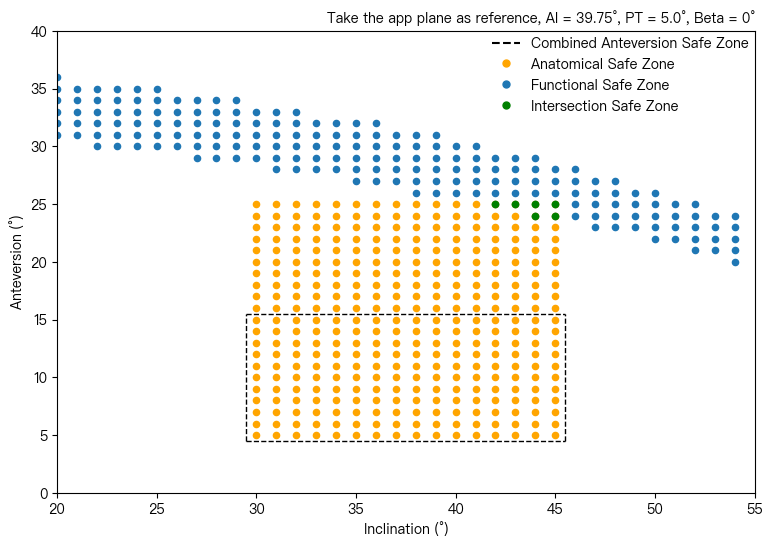

In [5]:
#PI= 32 SSs = 34 LL= 43 SSsitting = 10.5

filename, msgs = gen_plot_with_PT_AI_app(PI = 37, LL = 12, SSstanding =32, SSsitting =20 ,d = 1,ESP = 3, FA = 20)

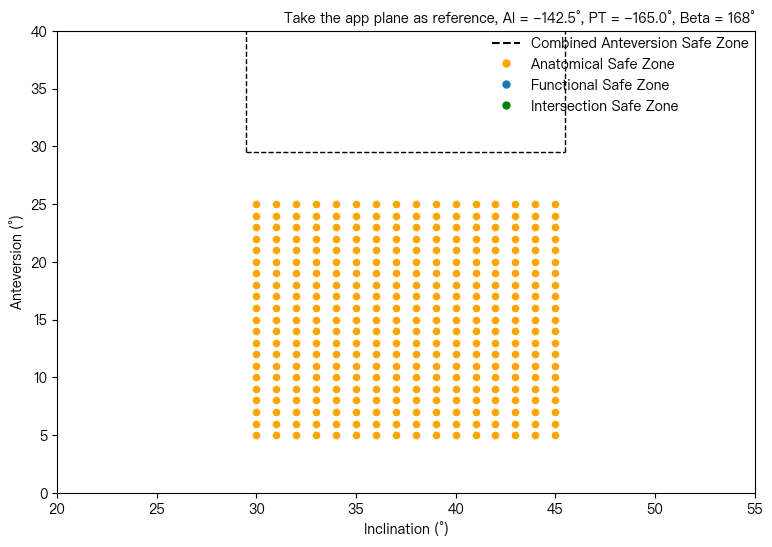

In [20]:
#PI= 32 SSs = 34 LL= 43 SSsitting = 10.5

filename, msgs = gen_plot_with_PT_AI_app(PI = 52, LL = 31, SSstanding =49, SSsitting =17 ,d = 1,ESP = 3, FA = -5,Beta = 168)

In [12]:
msgs 

['Flat back and normal pelvic mobility；',
 'Suggestions：Anteversionₐₚₚ  = 20°～25°，Inclinationₐₚₚ  = 40°～45°，Combine Anteversion = 25°～35°']